# Proyek Analisis Data: Bike Sharing

- **Nama:** Sahrul Hidayat
- **Email:** sahrulhint@gmail.com
- **ID Dicoding:** sahrulhidayat

## Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir di tahun 2012?
- Jam berapa biasanya paling banyak dan paling sedikit orang yang menyewa sepeda?
- Hari apa saja yang paling banyak orang menyewa sepeda?
- Bagaimana situasi cuaca yang paling digemari untuk menyewa sepeda?

## Menyiapkan Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data dari **day.csv** dan **hour.csv** memiliki kolom-kolom yang sama, kecuali kolom **hr** yang tidak ada pada **day.csv**
- Data dari **day.csv** merekam data peminjaman sepeda setiap hari sedangkan **hour.csv** merekam data peminjaman sepeda setiap jam

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Semua tipe data sudah sesuai
- Data Bike Sharing tidak memiliki data duplikasi, missing value, atau innacurate

## Exploratory Data Analysis (EDA)

### Explore

In [11]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
492,493,2012-05-07,2,1,5,0,1,1,2,0.537500,0.527142,0.664167,0.230721,1008,5265,6273
100,101,2011-04-11,2,0,4,0,1,1,2,0.595652,0.565217,0.716956,0.324474,855,2493,3348
696,697,2012-11-27,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959
70,71,2011-03-12,1,0,3,0,6,0,1,0.329167,0.325750,0.594583,0.220775,724,1408,2132
543,544,2012-06-27,3,1,6,0,3,1,1,0.697500,0.640792,0.360000,0.271775,1077,6258,7335
510,511,2012-05-25,2,1,5,0,5,1,1,0.680000,0.627529,0.747083,0.140550,1417,5317,6734
218,219,2011-08-07,3,0,8,0,0,0,1,0.742500,0.715292,0.752917,0.201487,1298,2487,3785
233,234,2011-08-22,3,0,8,0,1,1,1,0.691667,0.638254,0.470000,0.276750,833,3925,4758
36,37,2011-02-06,1,0,2,0,0,0,1,0.285833,0.291671,0.568333,0.141800,354,1269,1623
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729


In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [13]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
395,396,2011-01-17,1,0,1,23,1,1,0,3,0.16,0.1364,0.86,0.2836,1,3,4
8783,8784,2012-01-06,1,1,1,19,0,5,1,1,0.46,0.4545,0.33,0.2836,11,261,272
15618,15619,2012-10-17,4,1,10,23,0,3,1,1,0.46,0.4545,0.88,0.2239,15,84,99
13184,13185,2012-07-08,3,1,7,13,0,0,0,1,0.94,0.8788,0.38,0.2537,118,219,337
10306,10307,2012-03-10,1,1,3,12,0,6,0,1,0.30,0.2727,0.33,0.3284,88,241,329
2901,2902,2011-05-05,2,0,5,19,0,4,1,1,0.54,0.5152,0.28,0.2239,56,305,361
16403,16404,2012-11-21,4,1,11,5,0,3,1,1,0.28,0.2879,0.87,0.1045,1,28,29
6765,6766,2011-10-14,4,0,10,11,0,5,1,3,0.52,0.5000,0.88,0.1642,11,76,87
8128,8129,2011-12-10,4,0,12,8,0,6,0,1,0.26,0.2727,0.65,0.1343,5,68,73
3853,3854,2011-06-14,2,0,6,11,0,2,1,1,0.64,0.6212,0.41,0.2836,40,103,143


In [14]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [15]:
def number_to_hour(num):
    hours = [dt.time(i).strftime('%H:%M') for i in range(0, 24)]
    return hours[num]
hour_df["hour"] = hour_df["hr"].apply(number_to_hour)

hour_df.groupby(by="hour").cnt.max().sort_values(ascending=False)

hour
18:00    977
17:00    976
08:00    839
16:00    783
12:00    776
13:00    760
14:00    750
15:00    750
19:00    743
11:00    663
07:00    596
21:00    584
20:00    567
10:00    539
22:00    502
09:00    426
00:00    283
23:00    256
06:00    213
01:00    168
02:00    132
03:00     79
05:00     66
04:00     28
Name: cnt, dtype: int64

In [16]:
def number_to_day(num):
    days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
    return days[num]
day_df["dayname"] = day_df["weekday"].apply(number_to_day)

day_df.groupby(by="dayname").cnt.max().sort_values(ascending=False)

dayname
Minggu    8714
Sabtu     8362
Senin     8227
Kamis     8173
Jumat     7804
Rabu      7767
Selasa    7525
Name: cnt, dtype: int64

In [17]:
def number_to_weather(num):
    weathers = ["","Cerah, Berawan", "Berkabut", "Hujan, Salju", "Badai"]
    return weathers[num]
day_df["weather"] = day_df["weathersit"].apply(number_to_weather)

day_df.groupby(by="weather").cnt.max().sort_values(ascending=False)

weather
Cerah, Berawan    8714
Berkabut          8362
Hujan, Salju      4639
Name: cnt, dtype: int64

In [18]:
def number_to_season(num):
    seasons = ["", "Spring", "Summer", "Fall", "Winter"]
    return seasons[num]

day_df["season_name"] = day_df["season"].apply(number_to_season)

day_df.rename(columns={"cnt": "user_count"}, inplace=True)
day_df.groupby(by="season_name").agg({
    "casual": "sum",
    "registered": "sum",
    "user_count": "sum"
})

,casual,registered,user_count
season_name,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


**Insight:**
- Orang-orang menyewa sepeda paling banyak adalah atau jam 18:00 dan paling sedikit adalah jam 04:00
- Orang-orang menyewa sepeda paling banyak adalah hari Minggu dan paling sedikit hari Selasa
- Orang-orang menyewa sepeda paling banyak pada saat cuaca Cerah atau Berawan, ketika cuaca Berkabut penyewa sepeda sedikit berkurang
- Orang-orang menyewa sepeda paling banyak pada musim gugur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir di tahun 2012?

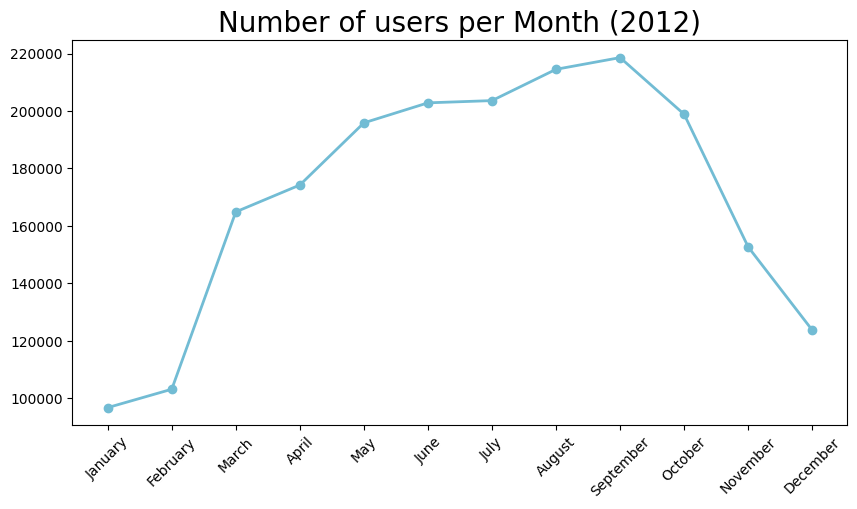

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday']) 
monthly_users_df = day_df.resample(rule='ME', on='dteday').agg({
    "user_count": "sum"
})

monthly_users_df.index = monthly_users_df.index.strftime('%B')
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.iloc[len(monthly_users_df) // 2:]

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_users_df["dteday"], monthly_users_df["user_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of users per Month (2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2: Jam berapa biasanya paling banyak dan paling sedikit orang yang menyewa sepeda?

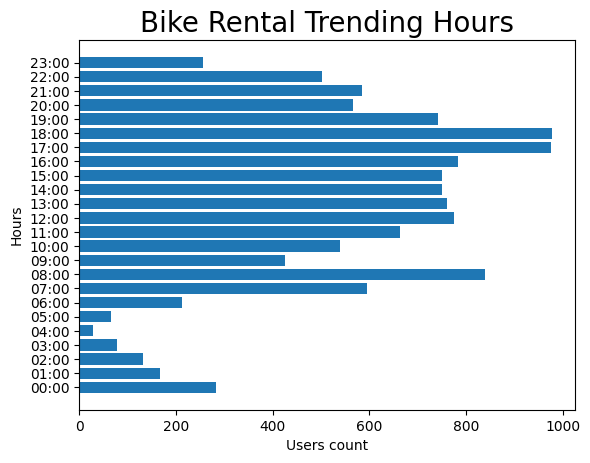

In [20]:
plt.barh(y=hour_df["hour"], width=hour_df["cnt"])
plt.xlabel("Users count")
plt.ylabel("Hours")
plt.title("Bike Rental Trending Hours", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.show()

### Pertanyaan 3: Hari apa saja yang paling banyak orang menyewa sepeda?

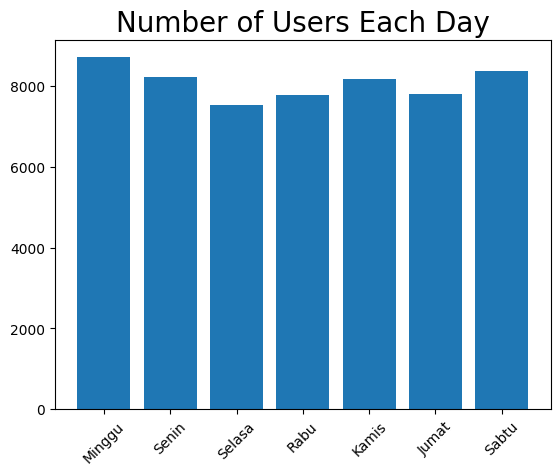

In [21]:
plt.bar(x=day_df["dayname"], height=day_df["user_count"])
plt.title("Number of Users Each Day", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45) 
plt.show()

### Pertanyaan 4: Bagaimana situasi cuaca yang paling digemari untuk menyewa sepeda?

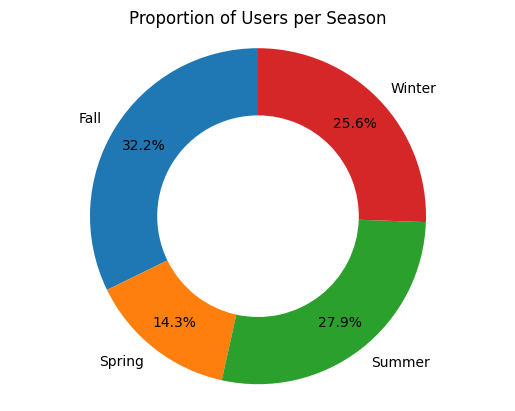

In [22]:
seasonal_max_users = day_df.groupby(by="season_name").agg({
    "casual": "sum",
    "registered": "sum",
    "user_count": "sum"
})

sizes = seasonal_max_users['user_count']
labels = seasonal_max_users.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.8 , startangle=90, wedgeprops = {'width': 0.4})
plt.axis('equal')
plt.title('Proportion of Users per Season')
plt.show()

In [26]:
day_df.to_csv("data/daily_edited.csv", index=False)

In [27]:
hour_df.to_csv("data/hourly_edited.csv", index=False)